# CSE 5522 Lab1 Part 2 with Normalization
# Name: Jian Gao

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split


In [2]:
people_URL = "https://raw.githubusercontent.com/efosler/cse5522data/master/height_vs_weight.csv"
people_df = pd.read_csv(people_URL)
people_dataset = np.array(people_df)
people_target = np.array(people_df[['basketball']])
column_name = np.array(people_df.columns.values)

In [3]:
# Split train and test datasets into 80/20
people_train, people_test, people_traintarget, people_testtarget = train_test_split(people_df,people_target, test_size = 0.2)

In [4]:
heights_train = np.array(people_train['height'], dtype='float').reshape(-1,1)
heights_test = np.array(people_test['height'], dtype = 'float').reshape(-1,1)

weight_train = np.array(people_train['weight'], dtype = 'float').reshape(-1,1)
weight_test = np.array(people_test['weight'], dtype = 'float').reshape(-1,1)

female_train = np.array(people_train['female']).reshape(-1,1)
female_test = np.array(people_test['female']).reshape(-1,1)

heights_train_norm = (heights_train - np.mean(heights_train))/np.std(heights_train)
heights_test_norm = (heights_test - np.mean(heights_test))/np.std(heights_test)

weight_train_norm = (weight_train - np.mean(weight_train))/np.std(weight_train)
weight_test_norm = (weight_test - np.mean(weight_test))/np.std(weight_test)


In [5]:
# Define method to compute accuracy
def compute_accuracy(predictions, targets):
    predictions_temp = []
    accuracy_count = 0.0 
    for x in range (len(predictions)):
        if predictions[x] > 0.5:
            predictions_temp.append(1.0)
        elif predictions[x] <= 0.5:
            predictions_temp.append(0.0)
    
    for y in range(len(predictions)):
        if predictions_temp[y] == targets[y]:
            accuracy_count +=1
            
    accuracy = accuracy_count / len(predictions)
    return accuracy
    

In [6]:
# Sigmoid function to predict features
def sigmoid_function(value):
    result = []
    for item in value:
        result.append(1/(1+math.exp(-item)))
    return result

In [7]:
# Get predictions depend on features' size
def get_prediction(weights, features):
    if features.shape[1] == 1:
        predictions = np.array([sigmoid_function(features * weights[0] + weights[1])])
    elif features.shape[1] == 2:
        predictions = np.array([sigmoid_function(features[:,0] * weights[0] + features[:,1] * weights[1] + weights[2])])
    elif features.shape[1] == 3:
        predictions = np.array([sigmoid_function(features[:,0] * weights[0] + features[:,1] * weights[1] + features[:,2] * weights[2] + weights[3])])
    predictions = np.transpose(predictions)
    return predictions

In [8]:
# Log loss function, return loss and accuracy
def loss_function(predictions, weights, features,  targets):
    accuracy = compute_accuracy(predictions, targets)
    length = len(targets)
    target_one_loss = targets*np.log(predictions)
    target_zero_loss = (1-targets)*np.log(1-predictions)
    loss = target_one_loss + target_zero_loss
    loss = -loss.sum() / length
    return [loss,accuracy]

In [9]:
# Compute gradient based on predictions and targets when only have one feature
def computeGradientForOneFeature(predictions, weights, features, targets):
    errors = predictions - targets
    sum_errors = errors.sum()
    gradient_w1 = np.dot(np.transpose(features), errors)
    gradient = np.array([gradient_w1.item(), sum_errors])
    gradient = gradient / len(features)
    return gradient                        

In [10]:
# Compute gradient based on predictions and targets when have two features
def computeGradientForTwoFeature(predictions, weights, features, targets):
    errors = predictions - targets
    sum_errors = errors.sum()
    gradient_w1 = np.dot(np.transpose(features[:,0]), errors)
    gradient_w2 = np.dot(np.transpose(features[:,1]), errors)
    gradient = np.array([gradient_w1[0],gradient_w2[0],sum_errors])
    gradient = gradient / len(features)
    return gradient                        

In [11]:
# Compute gradient based on predictions and targets when have three features
def computeGradientForThreeFeature(predictions, weights, features, targets):
    errors = predictions - targets
    sum_errors = errors.sum()
    gradient_w1 = np.dot(np.transpose(features[:,0]), errors)
    gradient_w2 = np.dot(np.transpose(features[:,1]), errors)
    gradient_w3 = np.dot(np.transpose(features[:,2]), errors)
    gradient = np.array([gradient_w1[0],gradient_w2[0],gradient_w3[0],sum_errors])
    gradient = gradient / len(features)
    return gradient                        

In [12]:
# Apply gradient descent on weights based on gradient
def computeGradientDescentWeightUpdate(predictions, weights, features, targets, learning_rate):
    if features.shape[1] == 1:
        gradient = computeGradientForOneFeature(predictions, weights, features, targets)
    elif features.shape[1] == 2:
        gradient = computeGradientForTwoFeature(predictions, weights, features, targets)
    elif features.shape[1] == 3:
        gradient = computeGradientForThreeFeature(predictions, weights, features, targets)
    weights = weights - learning_rate * gradient
    return weights

In [13]:
# Train the logistic regression model by applying gradient 10000 times, return updated weights and predictions
def trainModel(weights, features, targets):
    loss_for_features = []
    accuracy_for_features = []
    learning_rate = 0.001
    for times in range(12000):
        predictions = get_prediction(weights, features)
        weights = computeGradientDescentWeightUpdate(predictions, weights, features, targets,learning_rate)
        result = loss_function(predictions, weights, features, targets)
        loss = result[0]
        accuracy = result[1]
        loss_for_features.append(loss)
        accuracy_for_features.append(accuracy)
        if times%1000==0:
            print ("iter: "+str(times) + " loss: "+ str(loss) + " weights: "+str(weights) + " accuracy: " + str(accuracy))
    average_loss_for_features = np.mean(np.array(loss_for_features))
    average_accuracy_for_features = np.mean(np.array(accuracy_for_features))
    print("Average loss is: " + str(average_loss_for_features) + " Average accuracy is: " + str(average_accuracy_for_features))
    return [weights, predictions]

In [14]:
# Test the model on test datasets and print loss and accuracy
def testModel(weights, features, targets):
    predictions_for_test = get_prediction(weights, features)
    result = loss_function(predictions_for_test, weights, features, targets)
    loss = result[0]
    accuracy = result[1]
    print("Loss: " + str(loss) + " accuracy: " + str(accuracy))

## Regard <font color = "red">"height" </font>as the only feature to predict

### Train the model with feature <font color = "red">"height" </font>


In [15]:
# Training data
weights_for_heights = np.array([0.,0.])
weights_for_heights, predictions_for_heights = trainModel(weights_for_heights, heights_train_norm, people_traintarget)


iter: 0 loss: 0.6931471805599453 weights: [1.85723358e-04 3.12500000e-06] accuracy: 0.496875
iter: 1000 loss: 0.6659738378002527 weights: [0.16455251 0.00277601] accuracy: 0.6375
iter: 2000 loss: 0.6493448609037363 weights: [0.29315142 0.00501351] accuracy: 0.6375
iter: 3000 loss: 0.6389902065700598 weights: [0.39464693 0.00692997] accuracy: 0.6375
iter: 4000 loss: 0.6324139599454937 weights: [0.47554328 0.00865818] accuracy: 0.6375
iter: 5000 loss: 0.6281589771661499 weights: [0.54062015 0.01026485] accuracy: 0.6375
iter: 6000 loss: 0.625360650938754 weights: [0.59339655 0.01177754] accuracy: 0.6375
iter: 7000 loss: 0.6234946337015269 weights: [0.63649255 0.01320408] accuracy: 0.6375
iter: 8000 loss: 0.6222357754790572 weights: [0.67188686 0.01454396] accuracy: 0.6375
iter: 9000 loss: 0.6213782560991931 weights: [0.70109556 0.01579427] accuracy: 0.6375
iter: 10000 loss: 0.6207893937756392 weights: [0.72529604 0.01695248] accuracy: 0.6375
iter: 11000 loss: 0.6203822924690762 weights: [

### Test the model with feature <font color = "red">"height" </font>


In [16]:
# Test data
testModel(weights_for_heights, heights_test_norm, people_testtarget)

Loss: 0.6479431108343828 accuracy: 0.6


### Plot the training data as well as the learned logistic regression function.

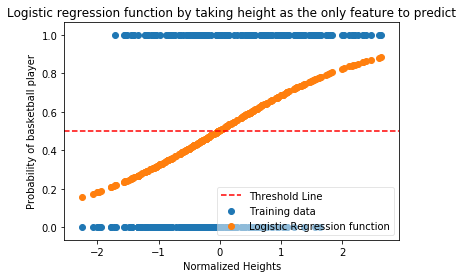

In [17]:
plt.scatter(heights_train_norm, people_traintarget, label="Training data")
plt.title("Logistic regression function by taking height as the only feature to predict")
plt.xlabel("Normalized Heights")
plt.ylabel("Probability of basketball player")
plt.scatter(heights_train_norm, predictions_for_heights, label = "Logistic Regression function")
plt.axhline(y=0.5, color='red', linestyle='--', label = "Threshold Line")
plt.legend(loc=4, prop={'size':10}, framealpha=0.5)
plt.show()

## Regard <font color = "red">"height" and "female"</font>as features to predict
### Training the model with features <font color = "red">"height" and "female"</font>

In [18]:
weights_for_heights_female = np.array([0.0,0.0,0.0])
heights_female_train = np.concatenate((heights_train_norm,female_train), axis = 1)
weights_for_heights_female, predictions_for_heights_female= trainModel(weights_for_heights_female, heights_female_train, people_traintarget)

iter: 0 loss: 0.6931471805599453 weights: [1.85723358e-04 6.25000000e-06 3.12500000e-06] accuracy: 0.496875
iter: 1000 loss: 0.6657403242693773 weights: [0.16486623 0.01141589 0.00220185] accuracy: 0.65
iter: 2000 loss: 0.6484360236765381 weights: [0.29465598 0.03076034 0.00224329] accuracy: 0.65
iter: 3000 loss: 0.6370243447803273 weights: [3.98374545e-01 5.52958914e-02 2.46491353e-05] accuracy: 0.65
iter: 4000 loss: 0.6291241481076839 weights: [ 0.48251064  0.08314497 -0.00431305] accuracy: 0.65
iter: 5000 loss: 0.6233814206930108 weights: [ 0.55175486  0.11303494 -0.01053719] accuracy: 0.646875
iter: 6000 loss: 0.6190091985515858 weights: [ 0.60951173  0.14410137 -0.01838993] accuracy: 0.653125
iter: 7000 loss: 0.6155375108944706 weights: [ 0.65828369  0.17575359 -0.0276177 ] accuracy: 0.6625
iter: 8000 loss: 0.6126778472240145 weights: [ 0.69993818  0.20758565 -0.03798427] accuracy: 0.659375
iter: 9000 loss: 0.6102483840689656 weights: [ 0.7358901   0.23931743 -0.04927619] accuracy

### Test the model with features <font color = "red">"height" and "gender"</font>

In [19]:
heights_female_test = np.concatenate((heights_test_norm,female_test), axis = 1)
testModel(weights_for_heights_female, heights_female_test, people_testtarget)


Loss: 0.6454369422536661 accuracy: 0.625


### Plot the training data as well as the learned logistic regression function for both <font color = "red">"Male heights" </font>  and <font color="red">"Female heights"</font>

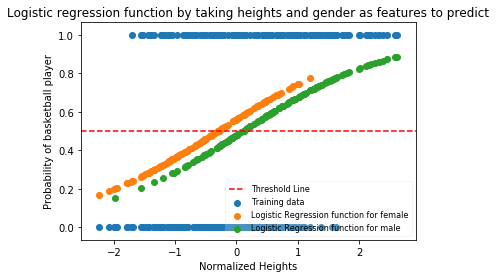

In [20]:
heights_train_for_female= heights_female_train[heights_female_train[:,1] != 0.0]
heights_train_for_male = heights_female_train[heights_female_train[:,1] == 0.0]
predictions_for_heights_female = get_prediction(weights_for_heights_female, heights_train_for_female)
predictions_for_heights_male = get_prediction(weights_for_heights_female, heights_train_for_male)
plt.title("Logistic regression function by taking heights and gender as features to predict")
plt.scatter(heights_train_norm, people_traintarget, label="Training data")
plt.xlabel("Normalized Heights")
plt.ylabel("Probability of basketball player")
plt.scatter(heights_train_for_female[:,0], predictions_for_heights_female, label = "Logistic Regression function for female")
plt.scatter(heights_train_for_male[:,0], predictions_for_heights_male, label = "Logistic Regression function for male")
plt.axhline(y=0.5, color='red', linestyle='--', label = "Threshold Line")
plt.legend(loc=4,prop={'size': 8}, framealpha=0.2)
plt.show()

## <font color = "red">Answer to questions:</font> "do the learned functions make sense relative to one another?"
    By seeing these two functions in the plot, it can be concluded that most male are taller than female. And for both male and female with same heights, it is more likely for female with that height to be a basketball player. By comparing these two functions to the one before ("height" is the only feature), it is more accurate by predicting with features "height" and "gender".

## Regard <font color = "red">"height" and "weight"</font>as features to predict
### Training the model with features <font color = "red">"height" and "weight"</font>

In [21]:
weights_for_heights_weight= np.array([0.0,0.0,0.0])
heights_weight_train = np.concatenate((heights_train_norm,weight_train_norm), axis = 1)
weights_for_heights_weight, predictions_for_heights_weight = trainModel(weights_for_heights_weight, heights_weight_train, people_traintarget)

iter: 0 loss: 0.6931471805599453 weights: [1.85723358e-04 2.33864296e-04 3.12500000e-06] accuracy: 0.496875
iter: 1000 loss: 0.6349766424810716 weights: [0.14368302 0.19133936 0.00280687] accuracy: 0.659375
iter: 2000 loss: 0.6105591445564718 weights: [0.22750109 0.32184328 0.00526528] accuracy: 0.659375
iter: 3000 loss: 0.5990697075873817 weights: [0.27631098 0.41656205 0.00761337] accuracy: 0.6625
iter: 4000 loss: 0.5930229344490796 weights: [0.30355621 0.48899264 0.00987219] accuracy: 0.6625
iter: 5000 loss: 0.589480487743669 weights: [0.31684981 0.5467626  0.01199682] accuracy: 0.6625
iter: 6000 loss: 0.5871744407382115 weights: [0.32078083 0.59446344 0.01394118] accuracy: 0.6625
iter: 7000 loss: 0.5855148421893073 weights: [0.31827006 0.63501601 0.01567493] accuracy: 0.6625
iter: 8000 loss: 0.584211095227384 weights: [0.31125724 0.67036084 0.01718432] accuracy: 0.6625
iter: 9000 loss: 0.583113725163533 weights: [0.30107276 0.70183074 0.01846861] accuracy: 0.6625
iter: 10000 loss: 

### Test the model with features <font color = "red">"height" and "weight"</font>

In [22]:
heights_weight_test = np.concatenate((heights_test_norm,weight_test_norm), axis = 1)
testModel(weights_for_heights_weight, heights_weight_test, people_testtarget)

Loss: 0.569834000935901 accuracy: 0.725


## Regard <font color = "red">"height" and "weight" and "gender"</font>as features to predict
### Training the model with features <font color = "red">"height" and "weight" and "gender"</font>

In [23]:
weights_for_all = np.array([0.0,0.0,0.0,0.0])
total_train = np.concatenate((heights_train_norm,weight_train_norm,female_train), axis = 1)
weights_for_all, predictions_for_all = trainModel(weights_for_all, total_train, people_traintarget)

iter: 0 loss: 0.6931471805599453 weights: [1.85723358e-04 2.33864296e-04 6.25000000e-06 3.12500000e-06] accuracy: 0.496875
iter: 1000 loss: 0.6344797562379458 weights: [0.14408205 0.19164436 0.01625306 0.00203427] accuracy: 0.659375
iter: 2000 loss: 0.6086871809117096 weights: [0.22942443 0.32324595 0.04529881 0.00134748] accuracy: 0.6625
iter: 3000 loss: 0.5953527443074221 weights: [ 0.28092454  0.41977458  0.08034627 -0.00214272] accuracy: 0.665625
iter: 4000 loss: 0.587307107347683 weights: [ 0.3118714   0.49453376  0.11792961 -0.00818372] accuracy: 0.665625
iter: 5000 loss: 0.5817774768505577 weights: [ 0.32970181  0.55497684  0.15624376 -0.01643172] accuracy: 0.678125
iter: 6000 loss: 0.5775729089283945 weights: [ 0.33884363  0.60555556  0.1943233  -0.02652608] accuracy: 0.678125
iter: 7000 loss: 0.5741346360091854 weights: [ 0.3420781   0.64908133  0.23164932 -0.0381213 ] accuracy: 0.690625
iter: 8000 loss: 0.5711805635050075 weights: [ 0.34122682  0.68740995  0.26795082 -0.05090

### Test the model with features <font color = "red">"height" and "weight" and "gender"</font>

In [24]:
total_test = np.concatenate((heights_test_norm,weight_test_norm,female_test), axis = 1)
testModel(weights_for_all, total_test, people_testtarget)

Loss: 0.5681762047191835 accuracy: 0.75


## <font color = "red">Answer to questions:</font>  : "Evaluate on average loss and accuracy.  Does weight help as a feature?"
### Conclusion of data: 
    "Height" as the only feature:
        In training data:   Average loss is: 0.6335282102011792 Average accuracy is: 0.63748828125
        In test data:       Loss: 0.6479431108343828 accuracy: 0.6
        
    "Height" and "gender" as features:
        In training data:   Average loss is: 0.6268102651340705 Average accuracy is: 0.6570533854166667
        In test data:       Loss: 0.6454369422536661 accuracy: 0.625
        
    "Height and weight" as features:       
        In training data:   Average loss is: 0.596675824442486 Average accuracy is: 0.6615966145833332
        In test data:       Loss: 0.569834000935901 accuracy: 0.725
        
    "Height, weight and gender" as features:   
        In training data:   Average loss is: 0.5874753280989101 Average accuracy is: 0.6812393229166667
        In test data:       Loss: 0.5681762047191835 accuracy: 0.75
        
     So, by comparing accuracy and loss, "weight" does help as a feature. After adding it, accuracy increased by comparing accuracy for feature("height", "gender", "weight") and feature("height", "gender"), and by comparing feature("height") and feature("heights", "weight")